# Analyzing Bay Wheels Trip Data - April 2020
## by Gabriel Medeiros das Neves

## Investigation Overview
In this investigation, I tried to figure it out which features were most related to the increase or decrease of the number of rentals, aiming to help the organization understand about the demand of the bicycles over the day, throughout the week or in the different stations in the region.  
I also aimed to assess which variables could be useful to predict the duration of a ride, to comprehend what can take a user to utilize a bicycle for longer periods of time.

## Dataset Overview
The data consisted of information about the approximately 84,000 trips made during the month of April 2020. The attributes included the bicycle type, time and date of bicycle rental and return, start and end stations, among others. Some data points were disregarded in the analysis on the duration of the trips because they had incorrect or unrealistic values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
clean_trip_data = pd.read_csv('clean_trip_data.csv')
clean_trip_data.head()

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
0,electric_bike,None,None,casual,8,8,4,Saturday,5.233333
1,electric_bike,None,None,casual,18,19,3,Friday,25.366667
2,electric_bike,None,None,casual,15,15,4,Saturday,1.283333
3,electric_bike,8th St at Ringold St,None,casual,20,22,3,Friday,107.050000
4,electric_bike,None,None,casual,18,18,3,Friday,7.666667


## Which is the most popular rideable type?
In April 2020, electric bikes were rented more than twice as often as docked bikes.  
In total, there were 57,710 electric bike rentals and 26,549 docked bike rentals.  


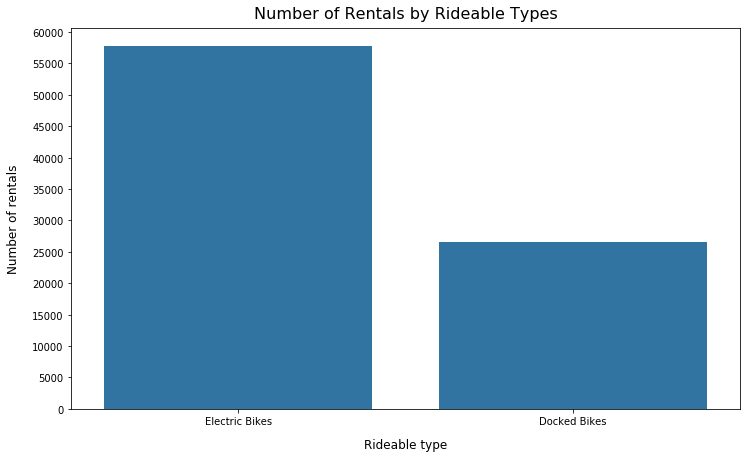

In [3]:
# Setting base color that will be used in this and other visualizations
base_color = sns.color_palette()[0]

plt.figure(figsize=(12, 7))
sns.countplot(data=clean_trip_data, x='rideable_type', color=base_color);
plt.title('Number of Rentals by Rideable Types', size=16, pad=10)
plt.xlabel('Rideable type', fontsize=12, labelpad=12)
plt.ylabel('Number of rentals', fontsize=12, labelpad=12)
plt.xticks([0, 1], ['Electric Bikes', 'Docked Bikes'])
plt.yticks(range(0, 60001, 5000));

## Which user account type used electric  bikes the most? What about docked bikes? 
When comparing the number of rentals by bike type and account type, it was observed that electric bikes were mostly used by casual users, while docked bikes were mostly used by members.

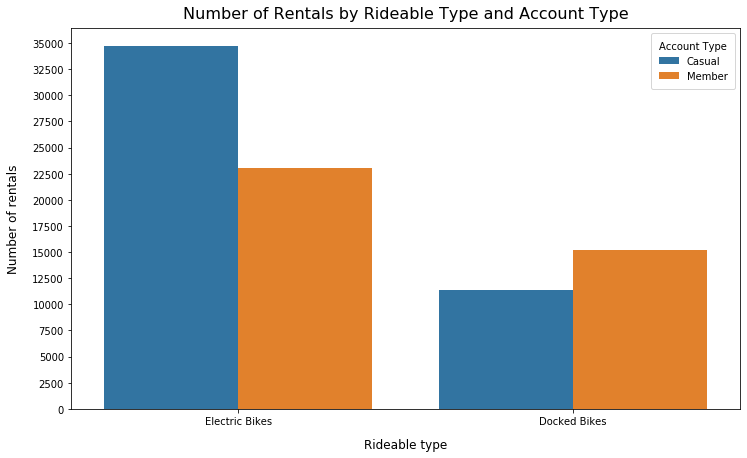

In [4]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=clean_trip_data, x='rideable_type', hue='account_type')
plt.title('Number of Rentals by Rideable Type and Account Type', size=16, pad=10)
plt.xlabel('Rideable type', fontsize=12, labelpad=12)
plt.ylabel('Number of rentals', fontsize=12, labelpad=12)
plt.xticks([0, 1], ['Electric Bikes', 'Docked Bikes'])
plt.yticks(range(0, 35001, 2500))
legend = ax.legend(title='Account Type', fontsize=10, borderpad=0.8)
legend.get_texts()[0].set_text('Casual')
legend.get_texts()[1].set_text('Member');

## Which hours of the day had more or less rentals?
The distribution of rentals by hour of the day proved to be a left-skewed distribution, with the largest number of rentals between noon and 7 pm. There was also a drastic drop in rents after 8 pm that lasted until 6 am, when the number of rentals increased again.


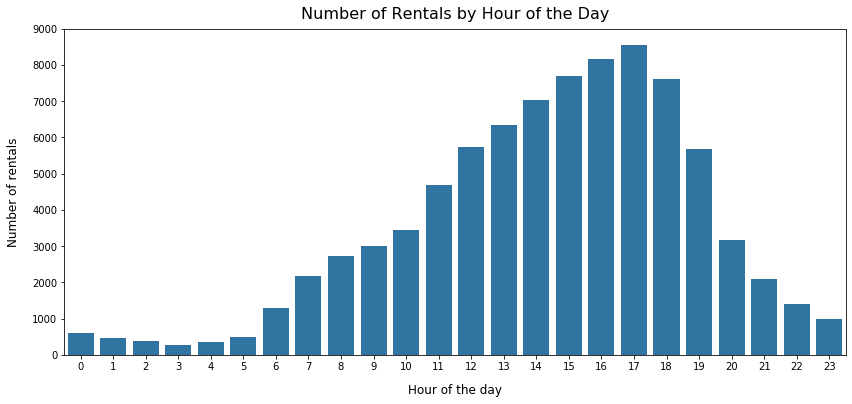

In [5]:
plt.figure(figsize=(14, 6))
sns.countplot(data=clean_trip_data, x='started_hour', color=base_color)
plt.title('Number of Rentals by Hour of the Day', size=16, pad=10)
plt.xlabel('Hour of the day', fontsize=12, labelpad=12)
plt.ylabel('Number of rentals', fontsize=12, labelpad=12)
plt.yticks(range(0, 9001, 1000));

## Which are the most popular stations?
The following plot shows the 15 stations with the highest number of trips associated (as starting point). Highlight for the Market St at 10th St station, which presented a significant advantage over the others.

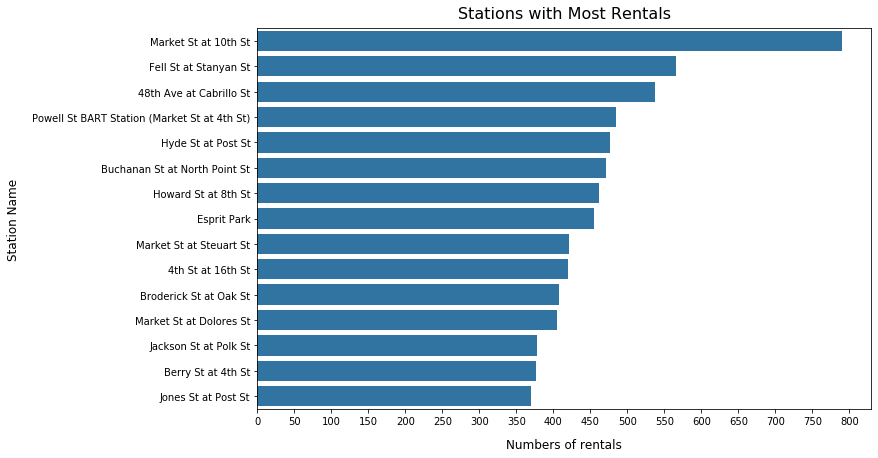

In [6]:
plt.figure(figsize=(11, 7))
popular_start_stations = clean_trip_data['start_station_name'].value_counts().index[1:16]
sns.countplot(data=clean_trip_data, y='start_station_name', color=base_color, order=popular_start_stations)
plt.title('Stations with Most Rentals', size=16, pad=10)
plt.xlabel('Numbers of rentals', fontsize=12, labelpad=12)
plt.ylabel('Station Name', fontsize=12, labelpad=12)
plt.xticks(range(0, 801, 50));

## Aditional Observation
Most of the popular stations as start points are also the most popular ones as return points, indicating that rides often begins and ends at the same location or that routes between stations are very common.

## Which are the less popular stations?
Unlike the previous visualization, this  plot shows the 15 stations with the lowest number of trips associated (as starting point). Note that, despite the length of the bars, the scale of the x-axis is much smaller, as well as the values represented.

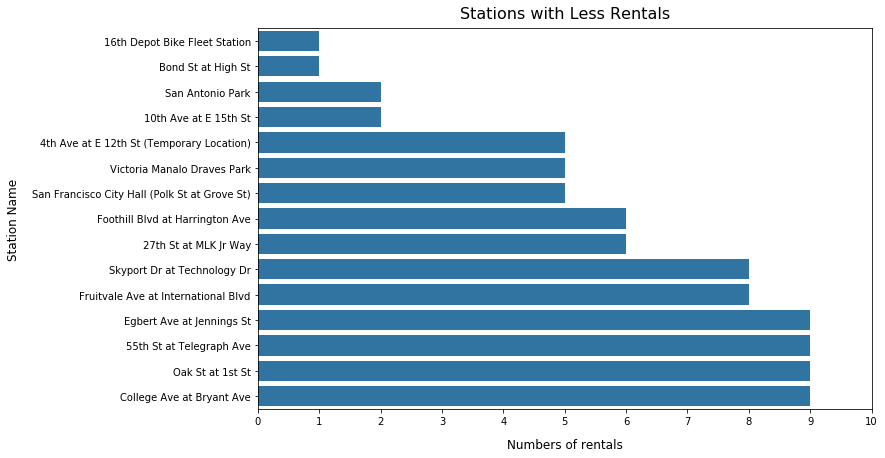

In [7]:
plt.figure(figsize=(11, 7))
unpopular_start_stations = clean_trip_data['start_station_name'].value_counts().index[-16:-1][::-1]
sns.countplot(data=clean_trip_data, y='start_station_name', color=base_color, order=unpopular_start_stations)
plt.title('Stations with Less Rentals', size=16, pad=10)
plt.xlabel('Numbers of rentals', fontsize=12, labelpad=12)
plt.ylabel('Station Name', fontsize=12, labelpad=12)
plt.xticks(range(0, 11));

## Which rideable type was the most rented at the popular stations?
Following the observed trend in the number of rentals by rideable type, most popular stations have a greater demand for electric bicycles, either with a small difference (Buchanan St at North Point St, Howard St at 8th St and Berry St at 4th St), or with a large difference (e.g., Market St at 10th St, Hyde St at Post St, Esprit Park, 4th St at 16th St).  
Contrarily, however, the Market St at Steuart St station showed a higher demand for docked bikes.

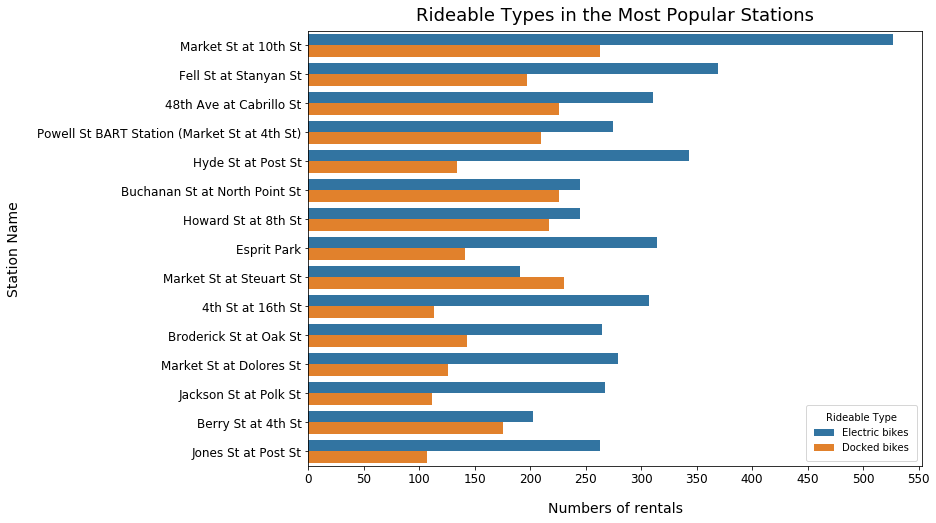

In [8]:
plt.figure(figsize=(11, 8))
ax = sns.countplot(data=clean_trip_data, y='start_station_name', hue='rideable_type', order=popular_start_stations)
ax.tick_params(labelsize=12)
plt.title('Rideable Types in the Most Popular Stations', size=18, pad=10)
plt.xlabel('Numbers of rentals', fontsize=14, labelpad=16)
plt.ylabel('Station Name', fontsize=14, labelpad=16)
plt.xticks(range(0, 600, 50))
legend = ax.legend(title='Rideable Type', fontsize=10, borderpad=0.8);
legend.get_texts()[0].set_text('Electric bikes')
legend.get_texts()[1].set_text('Docked bikes')

## How was the distribution of rentals in the most popular stations per hour of the day?
Popular stations clearly demonstrate the observed trend in the number of rentals per hour of the day, especially when looking at Fell St at Stayan St and 48th Ave at Cabrillo St stations, where rental distribution is well delimited between 1 pm and 7 pm.  
It is also worth noting the high number of rentals at 6 am at Berry St at 4th St station, surpassing all other times of the day, as well as the rentals at Market St at 10th St, which, despite occurring more in the afternoon, are well distributed throughout the day.

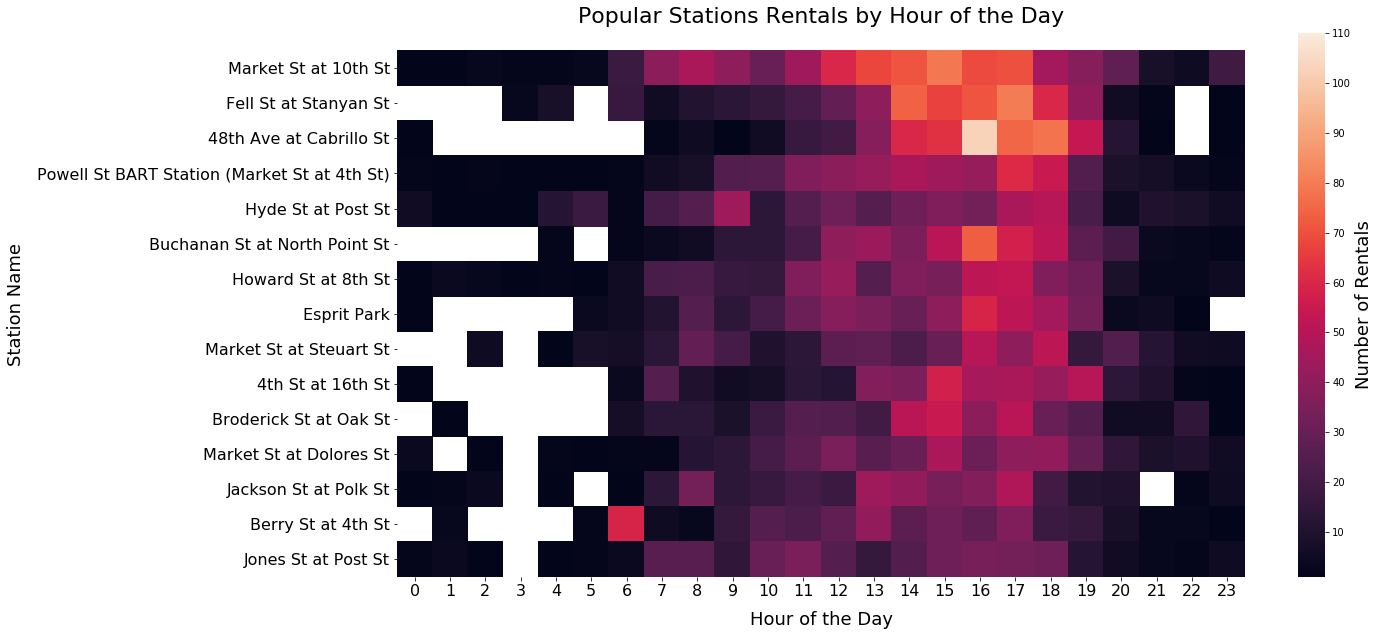

In [9]:
top_stations_df = clean_trip_data[clean_trip_data.start_station_name.isin(popular_start_stations.values)]

plt.figure(figsize=(19, 10))

# Selecting number of trips grouped by started_hour and start_station_name
grouped_df = top_stations_df.groupby(['started_hour', 'start_station_name']).size().reset_index()
# Pivoting df so that every hour is a column and every station is a index
pivoted_grouped_df = grouped_df.pivot(index='start_station_name', columns='started_hour')
# Reindexing df and selecting only the most popular stations
popular_stations_count = pivoted_grouped_df.reindex(index=popular_start_stations)


ax = sns.heatmap(popular_stations_count, vmax=110, cbar_kws={'label': 'Number of Rentals', 
                                                             'ticks': range(0, 111, 10)})
ax.tick_params(labelsize=16)
ax.figure.axes[-1].yaxis.label.set_size(18)
ax.set_ylim(len(popular_start_stations.values), -0.5)
plt.title('Popular Stations Rentals by Hour of the Day', size=22, pad=10)
plt.xlabel('Hour of the Day', fontsize=18, labelpad=12)
plt.ylabel('Station Name', fontsize=18, labelpad=12)
ax.set_xticklabels(range(0, 24), rotation=0);

## Aditional Observations
* The majority of the trips on Berry St at 4th St station at 6 am were made by members.
* 4th St at 16th St station had a low number of casual rides when compared to members, especially between 3pm and 7 pm.
* Most of the trips on Berry St at 4th St station at 6 am were with electric bikes.
* Hyde St at Post St had a notable higher demand for electric bikes when compared to docked bikes.

## Which user account type made more rentals in each one of the weekdays?
Overall, the distribution is very similar, with small variations throughout the week. However, the number of rentals by casual users grows considerably on weekends, at the same time that the number of members slightly drops, increasing the difference. In addition, Mondays contradict the trend and have a higher number of rentals by members.

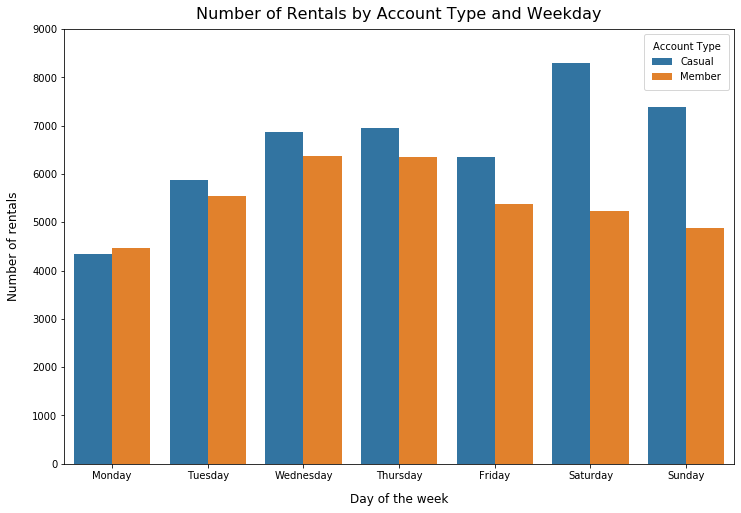

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=clean_trip_data, x='weekday', hue='account_type', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rentals by Account Type and Weekday', size=16, pad=10)
plt.xlabel('Day of the week', fontsize=12, labelpad=12)
plt.ylabel('Number of rentals', fontsize=12, labelpad=12)
plt.yticks(range(0, 9001, 1000))
legend = ax.legend(title='Account Type', fontsize=10, borderpad=0.8)
legend.get_texts()[0].set_text('Casual')
legend.get_texts()[1].set_text('Member');

## How was the distribution of trip time?
The trip time distribution is a right-skewed distribution, with approximately 99% of its values between 0 and 130. For this reason, I decided to analyze only trips up to 200 minutes, since these represent the majority of trips (other scales, such as logarithmic, were used in the exploration, but did not help to better interpret the data).  
As expected after checking simple descriptive statistics of the data, it was concluded that most trips are short trips, up to half an hour in duration.

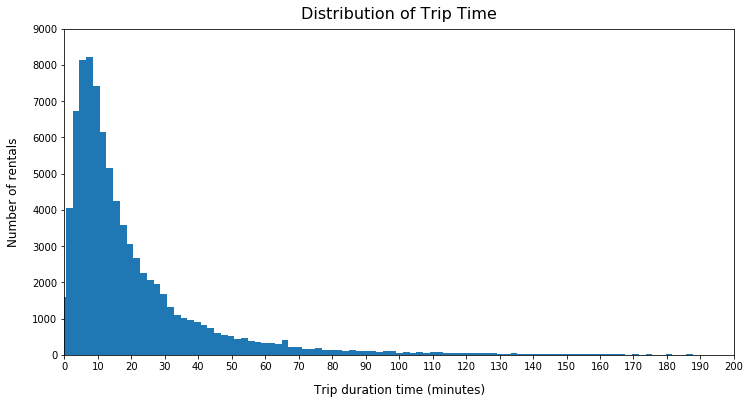

In [11]:
trip_time_under_200 = clean_trip_data.query('trip_time < 200')
plt.figure(figsize=(12, 6))
plt.hist(data=trip_time_under_200, x='trip_time', bins=100)
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.title('Distribution of Trip Time', size=16, pad=10)
plt.xlabel('Trip duration time (minutes)', fontsize=12, labelpad=12)
plt.ylabel('Number of rentals', fontsize=12, labelpad=12)
plt.yticks(range(0, 9001, 1000));

## Aditional Observations
* 67 trips had negative trip time values, which is definely a error that should be fixed for further analysis.
* There are some rides with insanely high values (54728 minutes, for example).
* There are some trips with more than one day as trip time, this is probably an user error (since it occured more with casual users), but it's worth mentioning.

## Were any correlations found between trip time and other features?
Some trends and correlations were found, but since they are not strong correlations, I decided not to add the visualizations created, in order to not extend the presentation too much. That being said, I will only summarize the findings in the following list:
* Docked bikes rides usually take longer.
* Casual users had, in general, longer trips than members.
* There were more longer trips between 10 am and 17 pm.
* Longer trips were more common on the weekends.
* Casual users rides had bigger variations on trip time, as well as docked bikes rides.

Use the following expression from the terminal or command line to run the presentation:
> `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide.